# lorapy symbol viewer

In [28]:
%load_ext autoreload
%autoreload 2

import pathlib

import os, sys
from loguru import logger
logger.remove(None)
logger.add(sys.stdout, colorize=True)

import numpy as np
import pandas as pd
from six.moves import cPickle
from tqdm import tqdm_notebook
import warnings 

import matplotlib.pyplot as plt 
# plt.style.use('dark_background')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import lorapy

## setup 

In [3]:
_BASE_DATA_DIR = pathlib.Path('../data')

BENCHTOP_DATA_DIR = _BASE_DATA_DIR.joinpath('lora-benchtop-recording')
DOTP_DATA_DIR = _BASE_DATA_DIR.joinpath('symbol-ref')
DEV_DATA_DIR = _BASE_DATA_DIR.joinpath('dev-data')
PROC_SYMBOL_DIR = _BASE_DATA_DIR.joinpath('processed-symbols')

# load

In [57]:
import random
import warnings 

rand = lambda mx: random.randint(0, mx - 1)

def _load_matching_dotp(bw: int, sf: int):
    return ploader.filter(bw=bw, sf=sf)[0]


def _plot_check(filtered_syms, num=20):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        fig, ax = plt.subplots(num, figsize=(14, 10))

        for idx in range(num):
            ax[idx].plot(filtered_syms[rand(filtered_syms.shape[0])])

## files

In [5]:
symloader = lorapy.load_dotp(PROC_SYMBOL_DIR)
symloader.file_list

2020-04-10 17:11:27.113 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: ../data/processed-symbols
2020-04-10 17:11:27.118 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 106 data file(s)


[DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=1 | name='lora_BW2_SF12_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=2 | name='lora_BW8_SF12_915MHz_20ksps_Att120_v0.p'),
 DotPFile(id=3 | name='lora_BW1_SF10_915MHz_20ksps_Att140_v0.p'),
 DotPFile(id=4 | name='lora_BW1_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=5 | name='lora_BW1_SF12_915MHz_20ksps_Att60_v0.p'),
 DotPFile(id=6 | name='lora_BW7_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=7 | name='lora_BW2_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=8 | name='lora_BW9_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=9 | name='lora_BW2_SF12_915MHz_20ksps_Att60_v0.p'),
 DotPFile(id=10 | name='lora_BW2_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=11 | name='lora_BW9_SF11_915MHz_20ksps_Att100_v0.p'),
 DotPFile(id=12 | name='lora_BW7_SF10_915MHz_20ksps_Att100_v0.p'),
 DotPFile(id=13 | name='lora_BW1_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=14 | name='lora_BW7_SF11_915MHz_20ksps_Att80_v0.p'),
 DotPFile(id=15 | na

In [7]:
ploader = lorapy.load_dotp(DOTP_DATA_DIR)
ploader.file_list

2020-04-10 17:11:27.158 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: ../data/symbol-ref
2020-04-10 17:11:27.160 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 15 data file(s)


[DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=1 | name='lora_BW1_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=2 | name='lora_BW9_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=3 | name='lora_BW2_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=4 | name='lora_BW9_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=5 | name='lora_BW2_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=6 | name='lora_BW8_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=7 | name='lora_BW7_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=8 | name='lora_BW8_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=9 | name='lora_BW8_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=10 | name='lora_BW1_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=11 | name='lora_BW2_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=12 | name='lora_BW9_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=13 | name='lora_BW7_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=14 | name='lora_BW7_SF11_915MHz_20ksps_Att0_v0.p')]

## symbols

In [8]:
file = symloader.select(33)
file.load()
display(file)

pfile = _load_matching_dotp(file.bw, file.sf)
display(pfile)

2020-04-10 17:11:27.184 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 17:11:27.324 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4416400 samples from file


DotPFile(id=33 | name='lora_BW9_SF10_915MHz_20ksps_Att80_v0.p')

DotPFile(id=12 | name='lora_BW9_SF10_915MHz_20ksps_Att0_v0.p')

In [9]:
symbols = file.to_signal()
symbols

BaselineSymbolSet(num symbols=11041 | BW: 9 | SF: 10 | Att: 80 | samples per symbol: 400 | packet length: 12100)

# symbol filtering

In [72]:
for file in symloader.file_list[:72]:
    pass
    
file

DotPFile(id=71 | name='lora_BW8_SF12_915MHz_20ksps_Att100_v0.p')

In [62]:
global conv_vals
conv_vals = None

def filter_symbols(file, plot=False):
    symbols = file.to_signal()
    display(symbols)

    pfile = _load_matching_dotp(file.bw, file.sf)
    base_symbol = pfile.to_signal()
    display(base_symbol)
    
    global conv_vals
    conv_vals = [
        base_symbol.convolve(sym)
        for sym in symbols.data
    ]
    
    thresh = np.mean(conv_vals)/2
    logger.info(f'set threshold: {thresh:0.4f}')
    
    if plot:
        df = pd.DataFrame(conv_vals).rename(columns={0: 'data'})
        df.plot.hist(bins=30)
    
    filtered_syms = np.vstack([
        sym for sym, conv in zip(symbols.data, conv_vals)
        if conv > thresh
    ])

    _removed_syms = symbols.data.shape[0] - len(filtered_syms)
    logger.info(f'removed {_removed_syms} symbols  [{len(filtered_syms)} / {symbols.data.shape[0]}]')
    
    if plot:
        _plot_check(filtered_syms, 40)
        
    return filtered_syms

In [ ]:
%%time
filtered_symbols = filter_symbols(file, plot=True)

2020-04-10 17:42:15.782 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 17:42:16.020 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8474700 samples from file


BaselineSymbolSet(num symbols=2650 | BW: 8 | SF: 12 | Att: 100 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 17:42:16.024 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 17:42:16.025 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 8 | SF: 12 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

In [13]:
symbols = file.to_signal()
display(symbols)

pfile = _load_matching_dotp(file.bw, file.sf)
base_symbol = pfile.to_signal()
display(base_symbol)

BaselineSymbolSet(num symbols=464 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 17:14:43.493 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 17:14:43.495 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

In [17]:
conv_vals = [
    base_symbol.convolve(sym)
    for sym in symbols.data
]

conv_vals[:5]

[0.9534672998086817,
 0.779707077947943,
 0.7399127920664756,
 0.7974460301182666,
 0.810086062414822]

In [39]:
thresh = np.mean(conv_vals)/2
logger.info(f'set threshold: {thresh:0.4f}')

2020-04-10 17:26:06.996 | INFO     | __main__:<module>:2 - set threshold: 0.3469


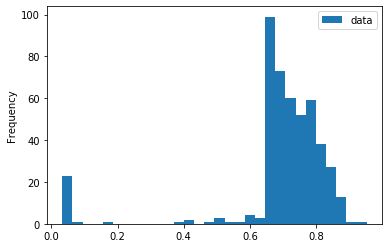

In [35]:
df = pd.DataFrame(conv_vals).rename(columns={0: 'data'})

df.plot.hist(bins=30)

In [44]:
filtered_syms = np.vstack([
    sym for sym, conv in zip(symbols.data, conv_vals)
    if conv > thresh
])

_removed_syms = symbols.data.shape[0] - len(filtered_syms)
logger.info(f'removed {_removed_syms} symbols  [{len(filtered_syms)} / {symbols.data.shape[0]}]')

2020-04-10 17:28:27.628 | INFO     | __main__:<module>:7 - removed 25 symbols  [439 / 464]


In [53]:
def _plot_check(filtered_syms, num=20):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        fig, ax = plt.subplots(num, figsize=(14, 10))

        for idx in range(num):
            ax[idx].plot(filtered_syms[rand(filtered_syms.shape[0])])

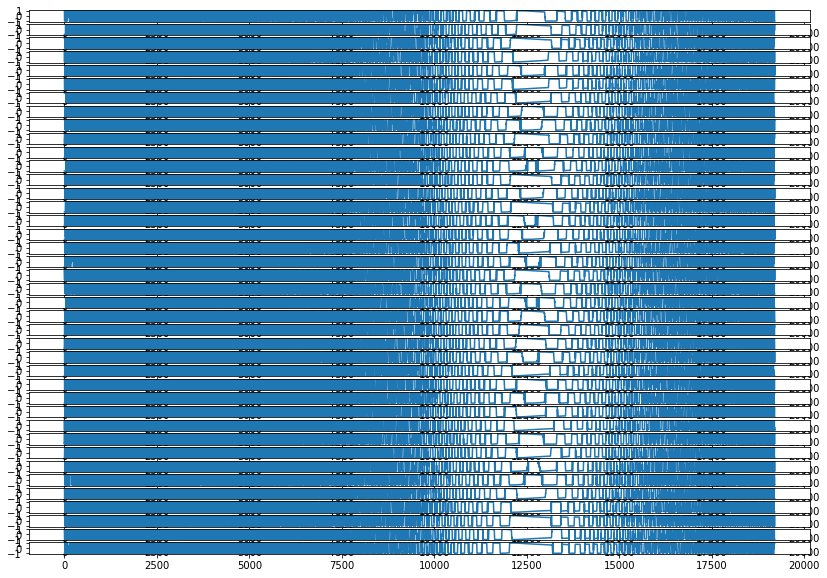

In [56]:
_plot_check(filtered_syms, 40)

## original 

In [ ]:
# for i in tnrange(21):

file = symloader.filter(bw=9)[i]
symbol = file.to_signal()

print(file)
print(symbol)

pfile = ploader.filter(bw=symbol.stats.bw, sf=symbol.stats.sf)[0]
print(pfile)
base_symbol = pfile.to_signal()

In [ ]:
conv_vals = [
    base_symbol.convolve(sym)
    for sym in symbol.data
]

print("Finished Convolution")
th = np.mean(conv_vals)/2
print(th)

new_syms = []
for i in range(symbol.num_symbols):
    if conv_vals[i] <= th:
        new_syms.append(symbol.data[i,:])

new_syms = np.asarray(new_syms)

In [ ]:
num2check = 20
fig = plt.figure(figsize=(15,20))
for i in range(num2check):
    plt.subplot(20,5,i+1)
    plt.plot(new_syms[i,:])
plt.show()
#display.display(plt.gcf())


print("Num Symbols: " + str(new_syms.shape))
filename = 'lora-symbols-20k-f/' + file.name
cPickle.dump(new_syms, open(filename,'wb'))
print("Dumped to File: " + filename)

# visualize

In [ ]:
symbols.num_symbols

In [ ]:
symbols.plot()

In [ ]:
batch_size = 50
batches = symbols.num_symbols // 50
print(f'batches = {batches}')

stop = 0

for epoch in range(1, symbols.num_symbols // 50):
    rows, cols = 10, 5
    fig, ax = plt.subplots(10, 5, figsize=(15,8))
    
    for i in range(rows):
        for j in range(cols):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                ax[i, j].plot(symbols.data[epoch*i + epoch*i*j])
            
    stop += 1
    if stop > 5:
        break
    